
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs
# BY MOAMEN GHAREEB



# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [11]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
y_test.shape

(10000, 1)

In [15]:
y_train.shape

(50000, 1)

# STEP #2: VISUALIZE DATA

[9]


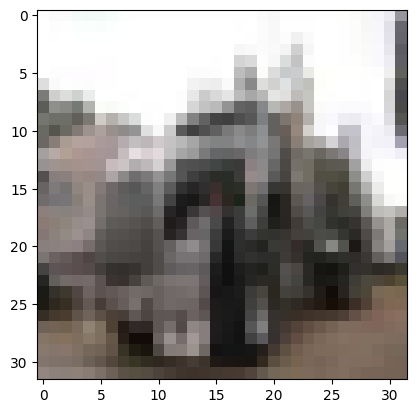

In [16]:
plt.imshow(x_train[122])
print(y_train[122])

In [17]:
l_grid = 15
w_grid = 15
print(np.arange(0,l_grid*w_grid))
fig,axes = plt.subplots(l_grid,w_grid,figsize=(25,25))
n_train = 50000
axes = axes.ravel()
for i in np.arange(0,l_grid*w_grid):
  index = np.random.randint(0,n_train)
  axes[i].imshow(x_train[index])
  axes[i].axis('off')
  axes[i].set_title(f'{y_train[index]}')
plt.subplots_adjust(hspace=.5,wspace=.4)


Output hidden; open in https://colab.research.google.com to view.

# STEP #3: DATA PREPARATION

In [21]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train.dtype


dtype('float32')

In [22]:
import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [25]:
input_shape = x_train.shape[1:]
input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [23]:
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,AveragePooling2D,Flatten,Conv2D,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [32]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape= input_shape))
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(.3))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(.2))
cnn.add(Flatten())
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=512,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

In [33]:
cnn.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [34]:
cnn.fit(x_train,y_train,epochs=10,batch_size=25,validation_split=.2)

Epoch 1/10
1600/1600 [==============================] - 148s 91ms/step - loss: 1.5848 - accuracy: 0.4131 - val_loss: 1.2944 - val_accuracy: 0.5273
Epoch 2/10
1600/1600 [==============================] - 146s 91ms/step - loss: 1.1884 - accuracy: 0.5743 - val_loss: 1.0588 - val_accuracy: 0.6314
Epoch 3/10
1600/1600 [==============================] - 142s 89ms/step - loss: 1.0247 - accuracy: 0.6374 - val_loss: 0.9446 - val_accuracy: 0.6708
Epoch 4/10
1600/1600 [==============================] - 143s 90ms/step - loss: 0.8995 - accuracy: 0.6808 - val_loss: 0.9057 - val_accuracy: 0.6788
Epoch 5/10
1600/1600 [==============================] - 146s 91ms/step - loss: 0.8037 - accuracy: 0.7150 - val_loss: 0.8117 - val_accuracy: 0.7186
Epoch 6/10
1600/1600 [==============================] - 145s 91ms/step - loss: 0.7350 - accuracy: 0.7385 - val_loss: 0.7745 - val_accuracy: 0.7308
Epoch 7/10
1600/1600 [==============================] - 141s 88ms/step - loss: 0.6763 - accuracy: 0.7604 - val_loss: 0

# STEP #5: EVALUATE THE MODEL

In [37]:
evaluation = cnn.evaluate(x_test,y_test)
print(f'Test Accuracy : {evaluation[1]}')

313/313 [==============================] - 9s 28ms/step - loss: 0.8565 - accuracy: 0.7267
Test Accuracy : 0.7267000079154968


In [46]:
predicted_probabilities = cnn.predict(x_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

313/313 [==============================] - 12s 38ms/step


In [47]:
predicted_classes

array([3, 8, 8, ..., 5, 1, 7])

In [48]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

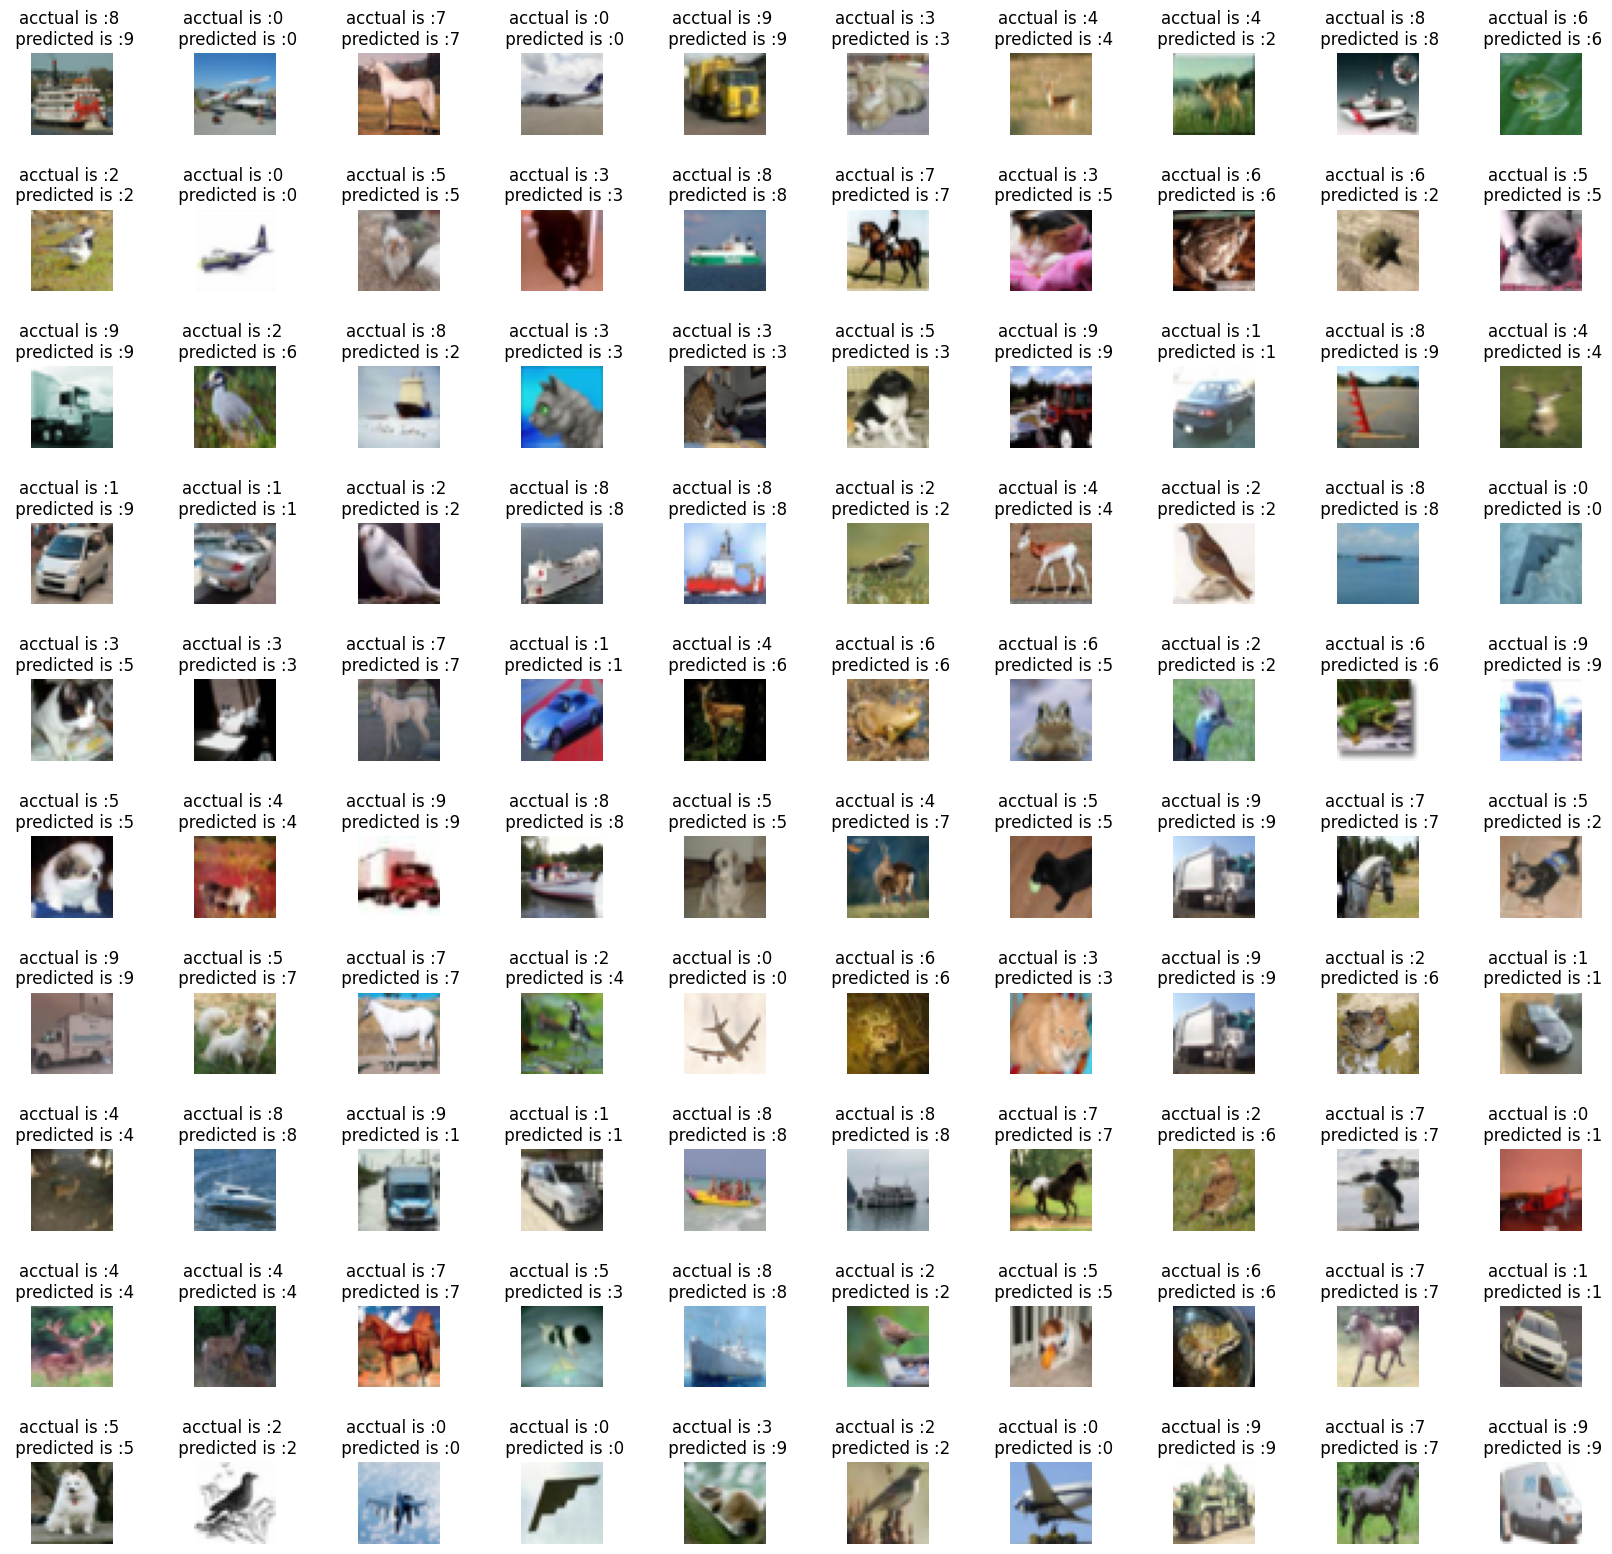

In [66]:
fig,axes = plt.subplots(10,10,figsize=(20,20))
axes = axes.ravel()
for i in np.arange(0,100):
  index = np.random.randint(0,10000)
  axes[i].imshow(x_test[index])
  axes[i].set_title(f'acctual is :{y_test[index]} \n predicted is :{predicted_classes[index]}')
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

<Axes: >

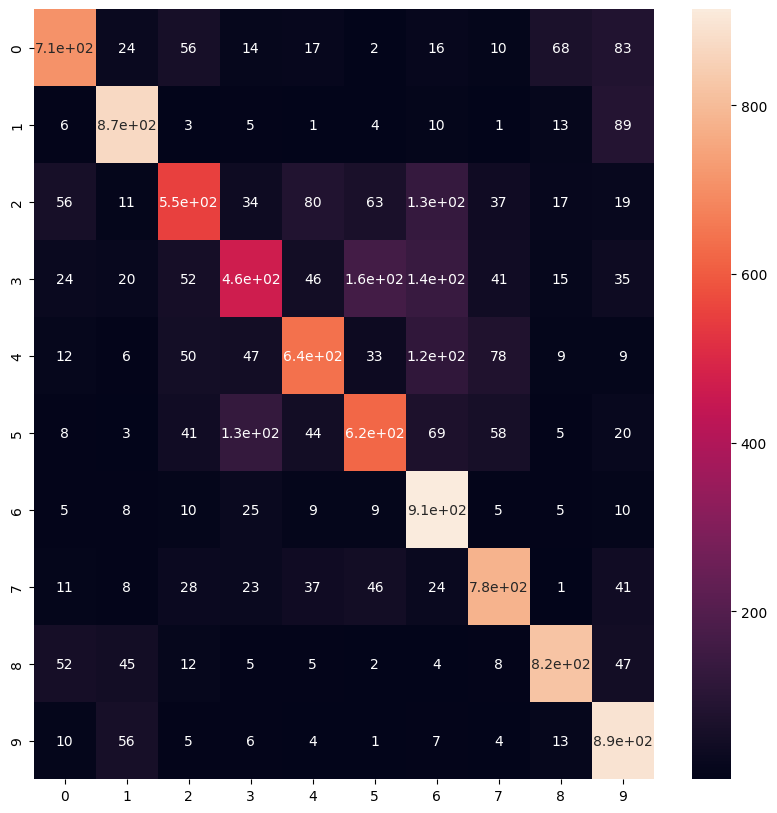

In [70]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted_classes)
cm
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

# STEP #6: SAVING THE MODEL

In [72]:
import os
directry = os.path.join(os.getcwd(),'saved_model')
if not os.path.isdir(directry):
  os.makedirs(directry)
model_path = os.path.join(directry,'cifar10_model.h5')
cnn.save(model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [75]:
!cp /content/saved_model/cifar10_model.h5 /content/drive/My\ Drive/


In [18]:
import tensorflow
cnn2 = tensorflow.keras.models.load_model('cifar10_model.h5')

# Optional: Display model summary
cnn2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      